In [6]:
import os
import numpy as np
import keras

import matplotlib.pyplot as plt
from glob import glob
from keras import layers

In [7]:
SEED = 42
IMAGE_SIZE = 128
MAX_IMG = 4000

In [8]:
from IPython.display import display
html = """
<!DOCTYPE html>
<html lang="fr">
<head>
<meta charset="UTF-8">
<title>Arborescence de Fichiers</title>
<style>
    ul {
        list-style-type: none; /* Enlève les puces */
    }
    ul.tree li {
        margin: 5px 0;
        position: relative;
    }
    ul.tree li:before {
        content: "📂"; /* Icône pour les dossiers */
        position: absolute;
        left: -20px;
    }
    ul.tree li.file:before {
        content: "📄"; /* Icône pour les fichiers */
    }
</style>
</head>
<body>

<h3>Files tree</h3>

<ul class="tree">
    <li>pet_images
        <ul>
            <li>cat
                <ul>
                    <li class="file">1.png</li>
                    <li class="file">2.png</li>
                    <li class="file">...</li>
                </ul>
            </li>
            
            <li>dog
                <ul>
                    <li class="file">1.png</li>
                    <li class="file">2.png</li>
                    <li class="file">...</li>
                </ul>
            </li>
        </ul>
    </li>
</ul>

</body>
</html>
"""
display({'text/html': html, 'text/plain': 'Hello World'}, raw=True)

Hello World

In [27]:
X = []
count = 0
y = []

for index_animal, animal in enumerate(['cat', 'dog']):
    for img_path in glob(os.path.join("pet_images/", animal, "**.jpg")):
        if count < MAX_IMG:
            try:
                image = keras.utils.load_img(img_path)
                image = image.resize((IMAGE_SIZE, IMAGE_SIZE))

                X.append(keras.utils.img_to_array(image))
                y.append(index_animal)
                count += 1
            except:
                pass
    count = 0

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
X = X / 255.

In [30]:
X.shape, y.shape

((8000, 128, 128, 3), (8000,))

In [31]:
y = keras.utils.to_categorical(y)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6400, 128, 128, 3), (1600, 128, 128, 3), (6400, 2), (1600, 2))

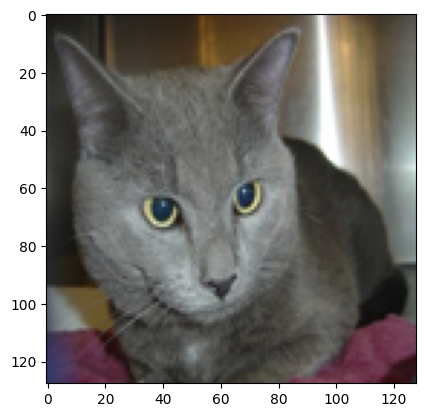

In [37]:
plt.imshow((X_train[0] * 255).astype(np.uint8))
plt.show()

In [38]:
y_train[0]

array([1., 0.])

In [39]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
num_classes = 2

In [40]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

2024-04-12 15:21:25.447494: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-12 15:21:25.447953: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-12 15:21:25.448147: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-12 15:21:25.448225: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-12 15:21:25.448502: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │       115,202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,594 (525.76 KB)

 Trainable params: 134,594 (525.76 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
batch_size = 32
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15


2024-04-12 15:21:29.407057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


180/180 ━━━━━━━━━━━━━━━━━━━━ 16s 79ms/step - accuracy: 0.5375 - loss: 0.7988 - val_accuracy: 0.6328 - val_loss: 0.6334
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.6637 - loss: 0.6284 - val_accuracy: 0.6906 - val_loss: 0.5817
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.6933 - loss: 0.5794 - val_accuracy: 0.7016 - val_loss: 0.5757
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.7297 - loss: 0.5373 - val_accuracy: 0.7063 - val_loss: 0.5530
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.7643 - loss: 0.4839 - val_accuracy: 0.6938 - val_loss: 0.5656
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.7865 - loss: 0.4434 - val_accuracy: 0.6375 - val_loss: 0.6822
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.7982 - loss: 0.4374 - val_accuracy: 0.7031 - val_loss: 0.5601
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.8285 - loss: 0.3892 - val_accurac

In [43]:
model.save('flask_app/models/model.keras')